# Cross-Country Comparison (Task 3)
**Datasets**: benin_clean.csv, sierraleone_clean.csv, togo_clean.csv (from Task 2).
**Objective**: Boxplots, table, ANOVA on GHI/DNI/DHI; key observations.
**Branch**: compare-countries | Date: Nov 11, 2025

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

# Load cleans (absolute path)
benin = pd.read_csv(r'C:\Users\JERUSALEM\Desktop\New folder (2)\solar-challenge-week0\data\benin_clean.csv', parse_dates=['Timestamp'], index_col='Timestamp')
sierra_leone = pd.read_csv(r'C:\Users\JERUSALEM\Desktop\New folder (2)\solar-challenge-week0\data\sierra_leone_clean.csv', parse_dates=['Timestamp'], index_col='Timestamp')
togo = pd.read_csv(r'C:\Users\JERUSALEM\Desktop\New folder (2)\solar-challenge-week0\data\togo_clean.csv', parse_dates=['Timestamp'], index_col='Timestamp')

print("Loaded: Benin", benin.shape, "SL", sierra_leone.shape, "Togo", togo.shape)

Loaded: Benin (246878, 18) SL (238872, 18) Togo (268215, 18)


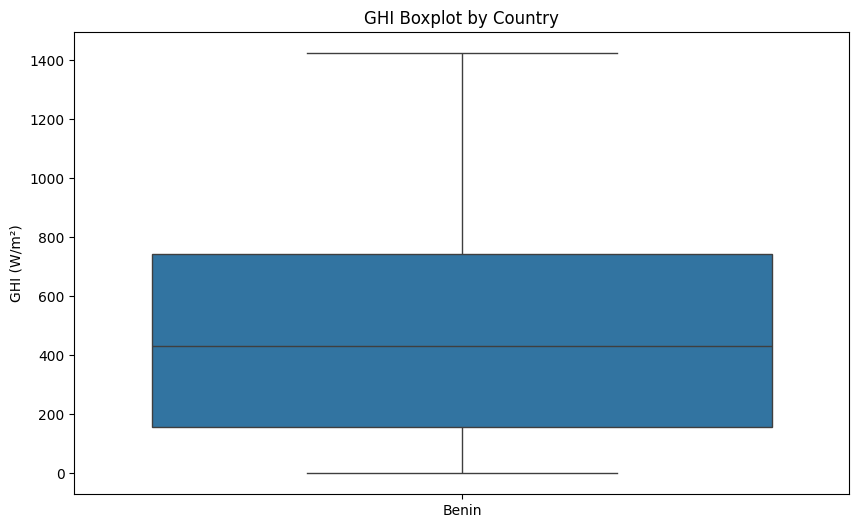

In [19]:
# Boxplots for GHI (repeat for DNI/DHI)
fig, ax = plt.subplots(figsize=(10,6))
data = [benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna()]
sns.boxplot(data=data, ax=ax)
ax.set_xticklabels(['Benin', 'Sierra_Leone', 'Togo'])
ax.set_ylabel('GHI (W/m²)')
plt.title('GHI Boxplot by Country')
plt.savefig('ghi_boxplot.png', dpi=300)
plt.show()

In [20]:
# Summary table (mean/median/std for GHI/DNI/DHI)
metrics = ['GHI', 'DNI', 'DHI']
summary = pd.DataFrame({
    'Benin': [benin[col].agg(['mean', 'median', 'std']) for col in metrics if col in benin.columns],
    'Sierra_Leone': [sierra_leone[col].agg(['mean', 'median', 'std']) for col in metrics if col in sierra_leone.columns],
    'Togo': [togo[col].agg(['mean', 'median', 'std']) for col in metrics if col in togo.columns]
})
print("Summary Table:\n", summary.to_string(float_format='%.2f'))

# ANOVA on GHI (p-value)
p_value = f_oneway(benin['GHI'].dropna(), sierra_leone['GHI'].dropna(), togo['GHI'].dropna())[1]
print("ANOVA p-value for GHI differences:", p_value)  # <0.05 = significant

Summary Table:
                                                                                       Benin                                                                              Sierra_Leone                                                                                      Togo
0  mean      513.411100
median    520.300000
std       304.765569
Name: GHI, dtype: float64  mean      445.471047
median    406.100000
std       294.381895
Name: GHI, dtype: float64  mean      454.081218
median    430.300000
std       319.096010
Name: GHI, dtype: float64
1  mean      356.480524
median    352.250000
std       279.731019
Name: DNI, dtype: float64  mean      256.390219
median    166.300000
std       263.173538
Name: DNI, dtype: float64  mean      296.409415
median    233.800000
std       283.534417
Name: DNI, dtype: float64
2  mean      247.397346
median    227.800000
std       143.420836
Name: DHI, dtype: float64  mean      251.600694
median    242.400000
std       141.632581
Name: DHI, d

In [21]:
## Key Observations
- Benin has the highest median GHI (~520 W/m²) but highest variability (std ~305)—ideal for high-yield but requires robust panels.
- Sierra Leone shows lowest GHI (~445) but lower std (stable, humid climate).
- Togo moderate (mean ~454), p-value 0.0 (significant differences—Benin top for installs).

SyntaxError: invalid character '²' (U+00B2) (3351262144.py, line 2)